In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette('viridis')


In [ ]:
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ']
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=5*365)).strftime('%Y-%m-%d')  # 5 years of data


In [ ]:
stock_data = yf.download(stocks, start=start_date, end=end_date)['Close']

# Display data
print(f"Collected data for {len(stocks)} stocks from {start_date} to {end_date}")
print(f"Data shape: {stock_data.shape}")
stock_data.head()

/tmp/ipython-input-6-1910386598.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stocks, start=start_date, end=end_date)['Close']
[*********************100%***********************]  10 of 10 completed


Collected data for 10 stocks from 2020-07-06 to 2025-07-05
Data shape: (1256, 10)


Ticker,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,META,MSFT,NVDA,TSLA
Date,,,,,,,,,,
2020-07-06,90.852028,152.852005,182.720001,74.535492,124.058273,83.070816,238.969009,201.868637,9.806925,91.438667
2020-07-07,90.570099,150.005997,181.149994,74.051880,123.945488,80.727341,239.545837,199.521332,9.839319,92.657333
2020-07-08,92.679497,154.055496,181.199997,74.731812,124.309921,81.584312,242.250992,203.909363,10.182438,91.058670
2020-07-09,93.078033,159.131500,178.800003,75.480316,123.633118,79.817940,243.165985,205.336914,10.474476,92.952003
2020-07-10,93.240868,160.000000,182.899994,76.491753,123.528992,84.181343,243.732864,204.714142,10.444823,102.976669


In [ ]:
# Calculate daily returns
returns = stock_data.pct_change().dropna()

# Calculate actual 5-day forward returns for each stock individually
for stock in stocks:
    returns[f'{stock}_Actual_5d_Return'] = stock_data[stock].pct_change(5).shift(-5)

# Calculate overall actual return (average across all stocks)
returns['Actual_5d_Return'] = returns[[f'{stock}_Actual_5d_Return' for stock in stocks]].mean(axis=1)

# Display returns data
print("\nDaily returns data:")
returns.head()


Daily returns data:


Ticker,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,META,MSFT,NVDA,TSLA,...,MSFT_Actual_5d_Return,AMZN_Actual_5d_Return,GOOGL_Actual_5d_Return,TSLA_Actual_5d_Return,NVDA_Actual_5d_Return,META_Actual_5d_Return,BRK-B_Actual_5d_Return,JPM_Actual_5d_Return,JNJ_Actual_5d_Return,Actual_5d_Return
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-07,-0.003103,-0.018619,-0.008592,-0.006488,-0.000909,-0.028211,0.002414,-0.011628,0.003303,0.013328,...,0.000480,0.027959,0.020766,0.091333,0.051181,-0.004692,0.047254,0.063800,0.035492,0.037527
2020-07-08,0.023290,0.026996,0.000276,0.009182,0.002940,0.010616,0.011293,0.021993,0.034872,-0.017254,...,-0.022506,-0.023446,0.008832,0.131878,0.001101,-0.013548,0.051656,0.068917,0.034829,0.026270
2020-07-09,0.004300,0.032949,-0.013245,0.010016,-0.005444,-0.021651,0.003777,0.007001,0.028681,0.020792,...,-0.048526,-0.057415,-0.002463,0.076283,-0.035612,-0.014601,0.068289,0.095640,0.047442,0.013708
2020-07-10,0.001749,0.005458,0.022931,0.013400,-0.000842,0.054667,0.002331,-0.003033,-0.002831,0.107848,...,-0.050498,-0.074384,-0.014399,-0.028362,-0.026505,-0.012405,0.042974,0.019632,0.049028,-0.009067
2020-07-13,-0.004613,-0.030000,0.006725,-0.017401,0.019948,0.014335,-0.024768,-0.030888,-0.040747,-0.030810,...,0.021876,0.029910,0.034128,0.097484,0.045612,0.026862,0.034486,-0.003584,0.030232,0.034717


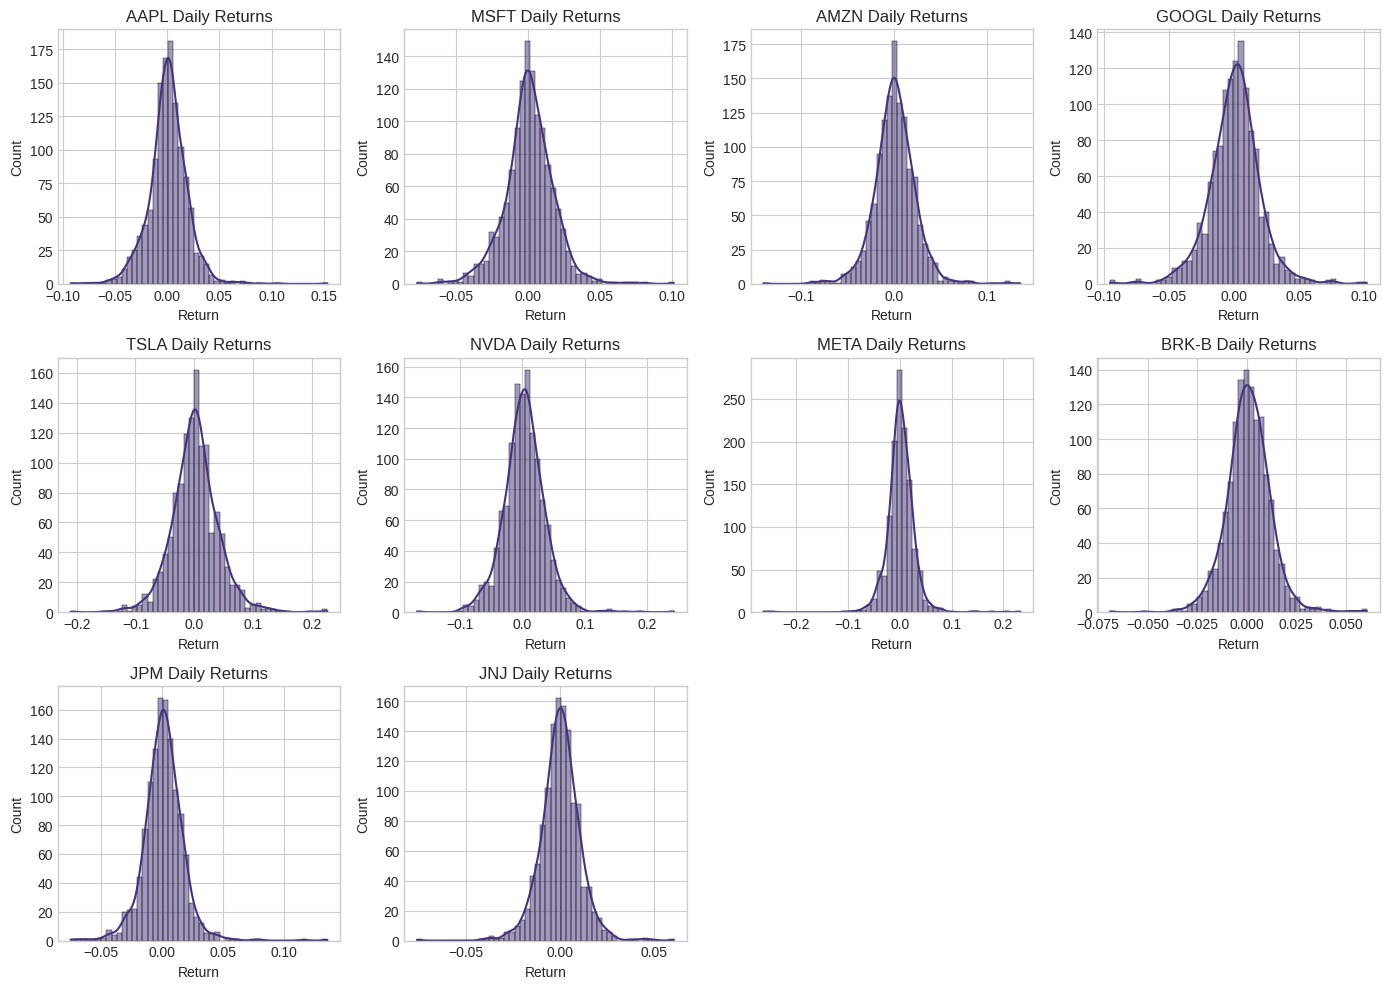

In [ ]:
plt.figure(figsize=(14, 10))
for i, stock in enumerate(stocks, 1):
    plt.subplot(3, 4, i)
    sns.histplot(returns[stock], bins=50, kde=True)
    plt.title(f"{stock} Daily Returns")
    plt.xlabel('Return')
plt.tight_layout()
plt.show()

In [ ]:
# Technical indicators
def calculate_technical_indicators(data):
    # Moving averages
    data['MA_5'] = data.rolling(window=5).mean()
    data['MA_20'] = data.rolling(window=20).mean()

    # Bollinger Bands
    data['BB_upper'] = data['MA_20'] + 2 * data.rolling(window=20).std()
    data['BB_lower'] = data['MA_20'] - 2 * data.rolling(window=20).std()

    # Relative Strength Index (RSI)
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # MACD
    ema12 = data.ewm(span=12, adjust=False).mean()
    ema26 = data.ewm(span=26, adjust=False).mean()
    data['MACD'] = ema12 - ema26
    data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

    # Price Rate of Change
    data['ROC'] = data.pct_change(periods=5)

    return data


In [ ]:
# First, ensure all our price data is numeric
stock_data = stock_data.apply(pd.to_numeric, errors='coerce')

# Calculate daily returns properly
returns = pd.DataFrame()
for stock in stocks:
    returns[stock] = stock_data[stock].pct_change()

# Calculate 5-day forward returns for each stock
forward_returns = pd.DataFrame()
for stock in stocks:
    forward_returns[f'{stock}_Actual_5d_Return'] = stock_data[stock].pct_change(5).shift(-5)

# Combine into single returns DataFrame
returns = pd.concat([returns, forward_returns], axis=1).dropna()

# Technical Indicators Calculation (fixed version)
def calculate_technical_indicators(price_series):
    """
    Calculate technical indicators for a single stock price series
    Returns a DataFrame with all indicators
    """
    indicators = pd.DataFrame(index=price_series.index)
    price_values = price_series.values

    # Simple Moving Averages
    indicators['MA_5'] = price_series.rolling(window=5).mean()
    indicators['MA_20'] = price_series.rolling(window=20).mean()

    # Bollinger Bands
    rolling_std = price_series.rolling(window=20).std()
    indicators['BB_upper'] = indicators['MA_20'] + (2 * rolling_std)
    indicators['BB_lower'] = indicators['MA_20'] - (2 * rolling_std)

    # RSI
    delta = price_series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()

    rs = avg_gain / avg_loss
    indicators['RSI'] = 100 - (100 / (1 + rs))

    # MACD
    ema12 = price_series.ewm(span=12, adjust=False).mean()
    ema26 = price_series.ewm(span=26, adjust=False).mean()
    indicators['MACD'] = ema12 - ema26
    indicators['Signal_Line'] = indicators['MACD'].ewm(span=9, adjust=False).mean()

    # Rate of Change
    indicators['ROC'] = price_series.pct_change(periods=5)

    return indicators

# Calculate indicators for each stock
all_indicators = {}
for stock in stocks:
    all_indicators[stock] = calculate_technical_indicators(stock_data[stock])

# Combine indicators into main returns DataFrame
for stock in stocks:
    indicators = all_indicators[stock]
    for col in indicators.columns:
        returns[f'{stock}_{col}'] = indicators[col]

# Add market return (S&P 500)
sp500 = yf.download('^GSPC', start=start_date, end=end_date)['Close']
returns['Market_Return'] = sp500.pct_change()

# Add volatility measure
returns['Volatility'] = returns[stocks].std(axis=1)

# Create lag features
for stock in stocks:
    for lag in [1, 2, 3, 5]:
        returns[f'{stock}_lag{lag}'] = returns[stock].shift(lag)

# Calculate overall actual return (average across all stocks)
returns['Actual_5d_Return'] = returns[[f'{stock}_Actual_5d_Return' for stock in stocks]].mean(axis=1)

# Clean up - drop any remaining NA values
returns.dropna(inplace=True)

# Display the final prepared data
print("\nFinal prepared dataset:")
print(f"Shape: {returns.shape}")
returns.head()

/tmp/ipython-input-14-2800685593.py:69: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed


Final prepared dataset:
Shape: (1232, 143)



/tmp/ipython-input-14-2800685593.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[f'{stock}_lag{lag}'] = returns[stock].shift(lag)
/tmp/ipython-input-14-2800685593.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[f'{stock}_lag{lag}'] = returns[stock].shift(lag)
/tmp/ipython-input-14-2800685593.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1)

,AAPL,MSFT,AMZN,GOOGL,TSLA,NVDA,META,BRK-B,JPM,JNJ,...,BRK-B_lag5,JPM_lag1,JPM_lag2,JPM_lag3,JPM_lag5,JNJ_lag1,JNJ_lag2,JNJ_lag3,JNJ_lag5,Actual_5d_Return
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-31,0.104689,0.005444,0.036961,-0.032775,-0.038138,0.000071,0.081748,0.007617,-0.003917,-0.007355,...,0.006572,-0.026685,0.024250,0.004334,-0.007072,0.002047,-0.001975,-0.002378,-0.009959,0.033834
2020-08-03,0.025198,0.056241,-0.016681,-0.003488,0.037910,0.037260,-0.006741,0.017775,-0.005588,0.010908,...,-0.012235,-0.003917,-0.026685,0.024250,-0.014042,-0.007355,0.002047,-0.001975,-0.006346,0.015135
2020-08-04,0.006678,-0.015009,0.008657,-0.006380,0.001347,0.019754,-0.008454,0.004918,-0.005723,-0.000882,...,0.010305,-0.005588,-0.003917,-0.026685,0.004334,0.010908,-0.007355,0.002047,-0.002378,0.000180
2020-08-05,0.003624,-0.001641,0.021091,0.003930,-0.001332,0.005255,-0.002842,0.016880,0.017373,0.008015,...,0.011797,-0.005723,-0.005588,-0.003917,0.024250,-0.000882,0.010908,-0.007355,-0.001975,0.023518
2020-08-06,0.034889,0.016014,0.006231,0.017484,0.003071,0.004319,0.064869,0.006876,0.000309,-0.005728,...,-0.010743,0.017373,-0.005723,-0.005588,-0.026685,0.008015,-0.000882,0.010908,0.002047,0.013658


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    """Enhanced evaluation function with NaN handling"""
    # Align and drop NA values
    df = pd.DataFrame({'true': y_true, 'pred': y_pred}).dropna()
    if len(df) == 0:
        raise ValueError("No valid data points after NA removal")

    y_true = df['true']
    y_pred = df['pred']

    # Rest of your evaluation code...
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"  MSE: {mse:.6f}")
    print(f"  MAE: {mae:.6f}")
    print(f"  R²: {r2:.4f}")

    # Plotting code...
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Actual Returns')
    plt.ylabel('Predicted Returns')
    plt.title(f'{model_name} Predictions vs Actual')
    plt.show()

    return mse, mae, r2

## Baseline Model 1: Historical Mean ##
Historical Mean Performance:
  MSE: 0.001063
  MAE: 0.025106
  R²: -0.0174


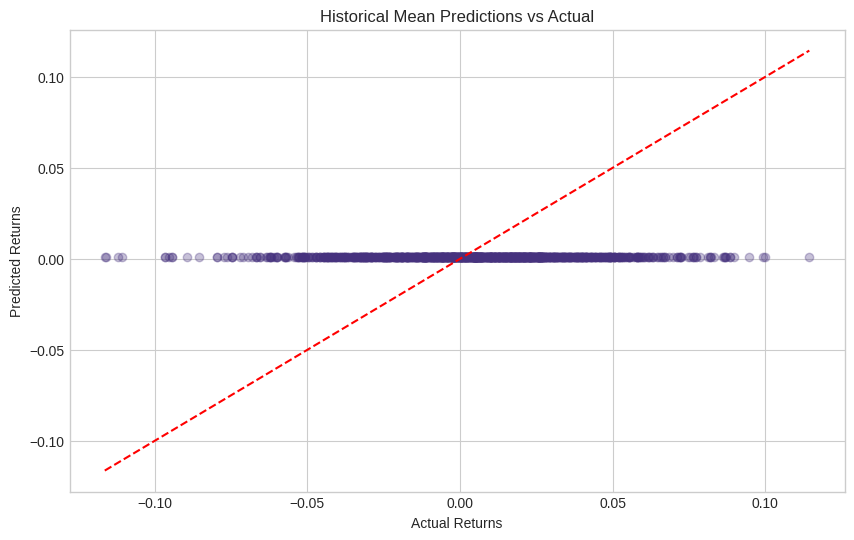

In [ ]:
print("## Baseline Model 1: Historical Mean ##")
historical_mean = returns[stocks].mean().mean()
mean_predictions = [historical_mean] * len(returns)
mean_perf = evaluate_model(returns['Actual_5d_Return'], mean_predictions, "Historical Mean")



## Baseline Model 2: Last Return ##
Last Return Performance:
  MSE: 0.001335
  MAE: 0.027539
  R²: -0.2778


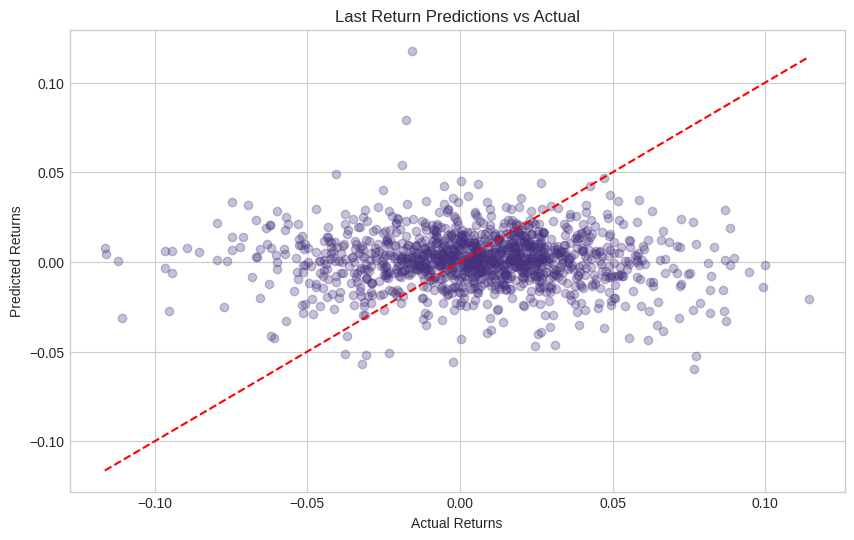

In [ ]:
# Model 2: Last Return (Naive Forecast)
print("\n## Baseline Model 2: Last Return ##")
last_return_predictions = returns[stocks].shift(1).mean(axis=1)
last_return_perf = evaluate_model(returns['Actual_5d_Return'], last_return_predictions, "Last Return")


## Model 3: Linear Regression ##
Linear Regression Performance:
  MSE: 0.001032
  MAE: 0.023991
  R²: 0.0305


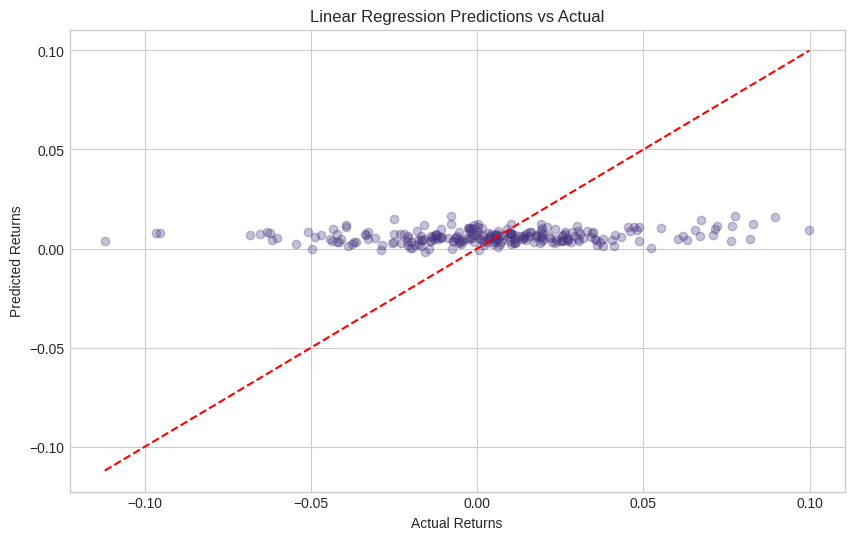

In [ ]:
# Model 3: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print("\n## Model 3: Linear Regression ##")

# Prepare features and target
features = [f'{stock}_lag1' for stock in stocks] + ['Market_Return', 'Volatility']
X = returns[features]
y = returns['Actual_5d_Return']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42
)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
lr_predictions = lr.predict(X_test)
lr_perf = evaluate_model(y_test, lr_predictions, "Linear Regression")



## Model 4: Random Forest ##
Random Forest Performance:
  MSE: 0.001140
  MAE: 0.024999
  R²: -0.0708


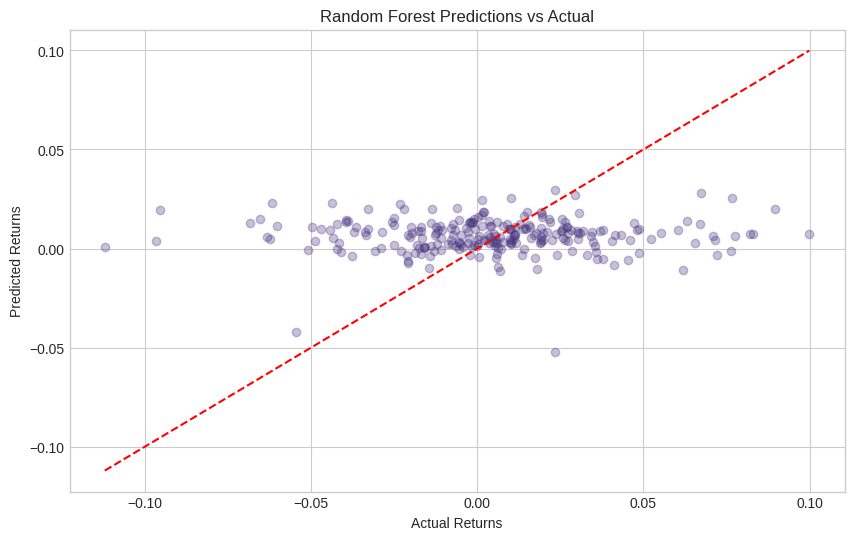

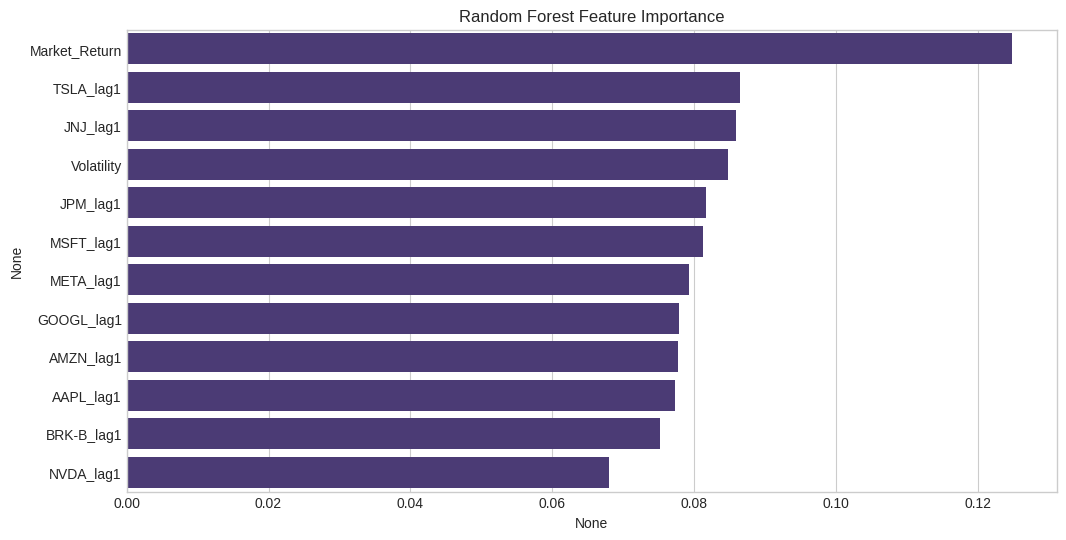

In [ ]:
# Model 4: Random Forest
from sklearn.ensemble import RandomForestRegressor

print("\n## Model 4: Random Forest ##")

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)
rf_perf = evaluate_model(y_test, rf_predictions, "Random Forest")

# Feature importance
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Random Forest Feature Importance")
plt.show()


## Model 5: XGBoost ##
XGBoost Performance:
  MSE: 0.001257
  MAE: 0.026750
  R²: -0.1810


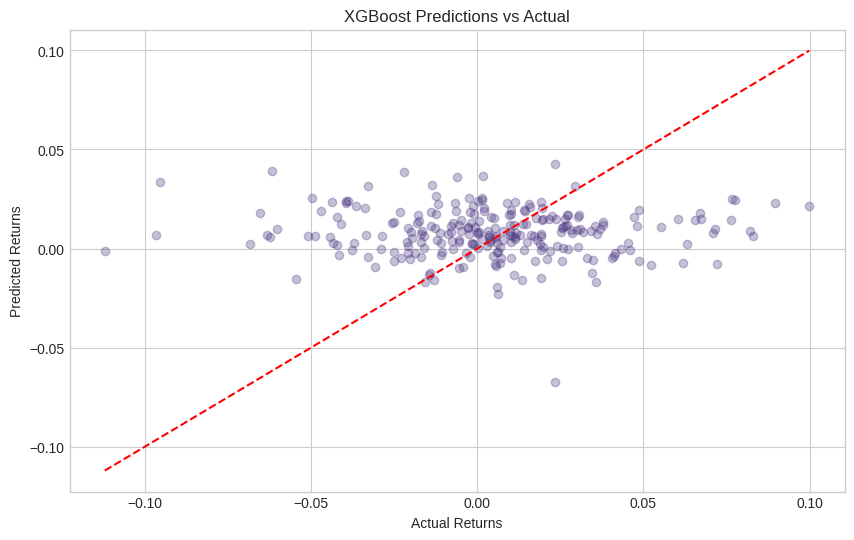

In [ ]:
# Model 5: XGBoost
from xgboost import XGBRegressor

print("\n## Model 5: XGBoost ##")

xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
xgb.fit(X_train, y_train)

xgb_predictions = xgb.predict(X_test)
xgb_perf = evaluate_model(y_test, xgb_predictions, "XGBoost")


## Model 6: LightGBM ##
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 985, number of used features: 12
[LightGBM] [Info] Start training from score 0.005616
LightGBM Performance:
  MSE: 0.001278
  MAE: 0.026567
  R²: -0.2003


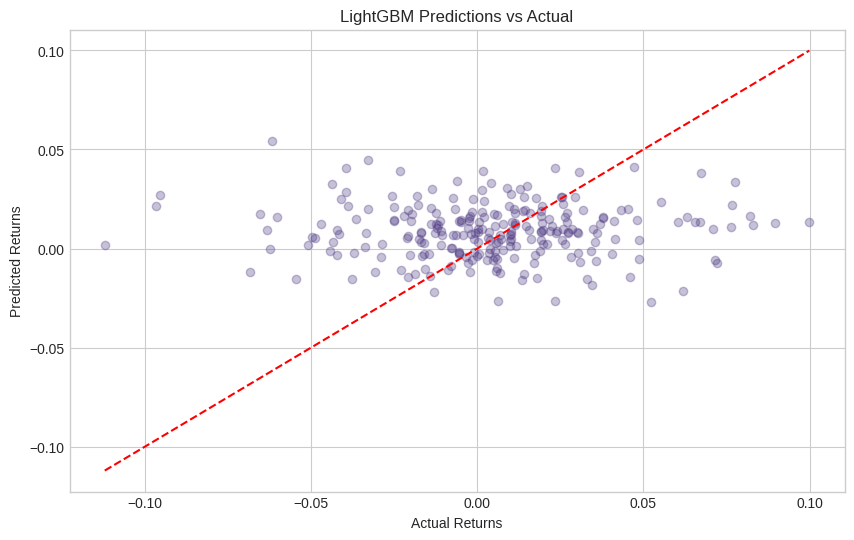

In [ ]:
from lightgbm import LGBMRegressor

print("\n## Model 6: LightGBM ##")

lgbm = LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
lgbm.fit(X_train, y_train)

lgbm_predictions = lgbm.predict(X_test)
lgbm_perf = evaluate_model(y_test, lgbm_predictions, "LightGBM")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Prepare data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, -1])  # Last column is target
    return np.array(X), np.array(y)

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(returns[features + ['Actual_5d_Return']])

# Create sequences
seq_length = 10
X_seq, y_seq = create_sequences(scaled_data, seq_length)

# Train-test split
split = int(0.8 * len(X_seq))
X_train_seq, X_test_seq = X_seq[:split], X_seq[split:]
y_train_seq, y_test_seq = y_seq[:split], y_seq[split:]

In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, len(features)+1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
# Train model
print("\n## Training LSTM Model ##")
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)



## Training LSTM Model ##
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0931 - val_loss: 0.0300
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0840 - val_loss: 0.0277
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0763 - val_loss: 0.0268
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0649 - val_loss: 0.0205
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0591 - val_loss: 0.0179
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0554 - val_loss: 0.0156
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0446 - val_loss: 0.0230
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0437 - val_loss: 0.0120
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0355 - val_loss: 0.0133
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0377 - val_loss: 0.0109
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0319 - val_loss: 0.0114
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0343 - val_l

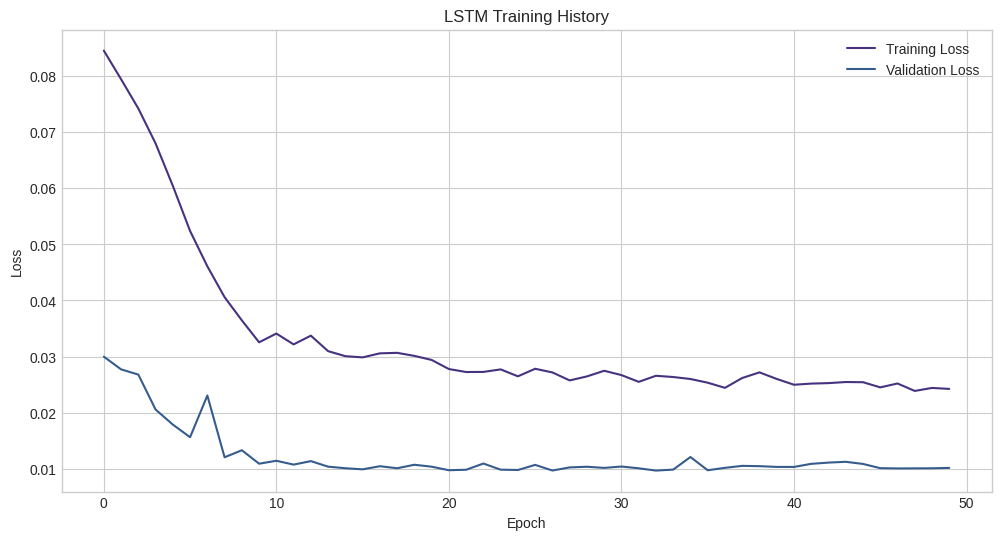

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step
LSTM Performance:
  MSE: 0.032627
  MAE: 0.127754
  R²: 0.5928


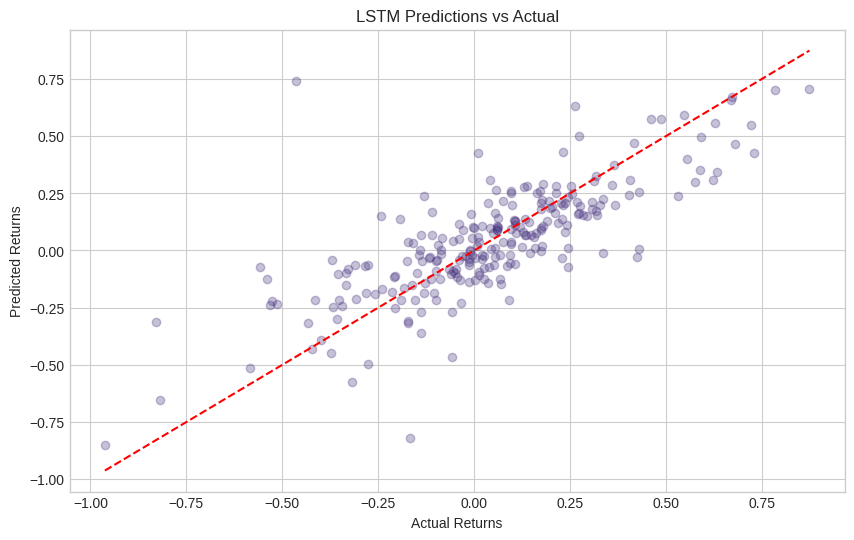

In [ ]:
lstm_predictions = model.predict(X_test_seq).flatten()
lstm_perf = evaluate_model(y_test_seq, lstm_predictions, "LSTM")

In [ ]:
# Compile performance metrics
model_names = [
    "Historical Mean", "Last Return", "Linear Regression",
    "Random Forest", "XGBoost", "LightGBM", "LSTM"
]
performance = [
    mean_perf, last_return_perf, lr_perf,
    rf_perf, xgb_perf, lgbm_perf, lstm_perf
]

In [ ]:
# Create comparison DataFrame
results = pd.DataFrame({
    'Model': model_names,
    'MSE': [p[0] for p in performance],
    'MAE': [p[1] for p in performance],
    'R²': [p[2] for p in performance]
})

# Sort by R² (descending)
results = results.sort_values('R²', ascending=False)

# Display results
print("\n## Model Performance Comparison ##")
display(results)


## Model Performance Comparison ##


,Model,MSE,MAE,R²
6,LSTM,0.032627,0.127754,0.592836
2,Linear Regression,0.001032,0.023991,0.030516
0,Historical Mean,0.001063,0.025106,-0.017361
3,Random Forest,0.001140,0.024999,-0.070814
4,XGBoost,0.001257,0.026750,-0.181008
5,LightGBM,0.001278,0.026567,-0.200266
1,Last Return,0.001335,0.027539,-0.277838


In [ ]:
test_dates = returns.index[-len(X_test_seq):]
returns.loc[test_dates, 'LSTM_Pred'] = lstm_predictions  # New column for predictions


/tmp/ipython-input-63-1771422314.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns.loc[test_dates, 'LSTM_Pred'] = lstm_predictions  # New column for predictions


In [ ]:

returns['Signal'] = 0
returns.loc[returns['LSTM_Pred'] > 0.005, 'Signal'] = 1    # Buy if prediction > 0.5%
returns.loc[returns['LSTM_Pred'] < -0.005, 'Signal'] = -1  # Sell if prediction < -0.5%

/tmp/ipython-input-65-4044107946.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns['Signal'] = 0


In [ ]:
# Avoid lookahead bias by executing next day
returns['Strategy_Return'] = returns['Signal'].shift(1) * returns['Actual_5d_Return']
returns.dropna(subset=['Strategy_Return'], inplace=True)  # Clean NaN from shift

/tmp/ipython-input-66-1116317196.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns['Strategy_Return'] = returns['Signal'].shift(1) * returns['Actual_5d_Return']


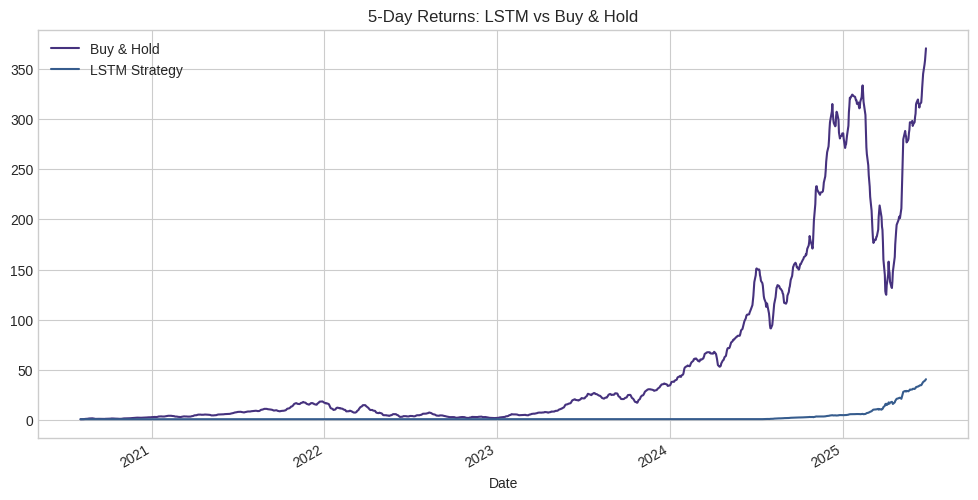

In [ ]:
# Cumulative returns
plt.figure(figsize=(12, 6))
(1 + returns['Actual_5d_Return']).cumprod().plot(label='Buy & Hold')
(1 + returns['Strategy_Return']).cumprod().plot(label='LSTM Strategy')
plt.title('5-Day Returns: LSTM vs Buy & Hold')
plt.legend()
plt.show()

In [ ]:
# Win rate
win_rate = (returns['Strategy_Return'] > 0).mean()

# Sharpe ratio (annualized)
sharpe = np.sqrt(252/5) * returns['Strategy_Return'].mean() / returns['Strategy_Return'].std()

print(f"Win Rate: {win_rate:.2%}")
print(f"Sharpe Ratio: {sharpe:.2f}")

Win Rate: 14.70%
Sharpe Ratio: 1.54


In [ ]:
# Analyze trades
positive_trades = returns[returns['Strategy_Return'] > 0]
negative_trades = returns[returns['Strategy_Return'] < 0]

print(f"Avg. Winning Trade: {positive_trades['Strategy_Return'].mean():.2%}")
print(f"Avg. Losing Trade: {negative_trades['Strategy_Return'].mean():.2%}")

Avg. Winning Trade: 2.71%
Avg. Losing Trade: -1.85%


In [ ]:
from scipy.optimize import minimize_scalar

def objective(threshold):
    # Generate signals as a Pandas Series
    signals = pd.Series(
        np.where(
            returns['LSTM_Pred'] > threshold, 1,
            np.where(returns['LSTM_Pred'] < -threshold, -1, 0)
        ),
        index=returns.index  # very important for alignment
    )

    strat_returns = signals.shift(1) * returns['Actual_5d_Return']
    return -np.mean(strat_returns)  # We want to maximize returns, so minimize negative

# Run optimization
result = minimize_scalar(objective, bounds=(0, 0.1), method='bounded')
optimal_threshold = result.x
print(f"Optimal threshold: {optimal_threshold:.4f}")


Optimal threshold: 0.0382


In [ ]:
# Scale position size by prediction confidence
returns['Position'] = returns['LSTM_Pred'].clip(-1, 1)  # Normalize to [-1, 1]
returns['Strategy_Return'] = returns['Position'].shift(1) * returns['Actual_5d_Return']

/tmp/ipython-input-72-2684883620.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns['Position'] = returns['LSTM_Pred'].clip(-1, 1)  # Normalize to [-1, 1]


In [ ]:
# Stop-loss at 2x avg. loss
avg_loss = negative_trades['Strategy_Return'].mean()
returns['Strategy_Return'] = np.where(
    returns['Strategy_Return'] < 2 * avg_loss,
    2 * avg_loss,
    returns['Strategy_Return']
)

In [ ]:
# After optimizations
win_rate = (returns['Strategy_Return'] > 0).mean()
sharpe = np.sqrt(252/5) * returns['Strategy_Return'].mean() / returns['Strategy_Return'].std()

print(f"New Win Rate: {win_rate:.2%}")
print(f"New Sharpe Ratio: {sharpe:.2f}")

New Win Rate: 14.87%
New Sharpe Ratio: 3.00
